In [7]:
!pip install soccerdata

In [8]:
import soccerdata as sd
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.cluster import KMeans, DBSCAN
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
import time
import requests

In [9]:
sd.FBref.available_leagues()

['BRA-Serie A',
 'Big 5 European Leagues Combined',
 'ENG-Premier League',
 'ESP-La Liga',
 'FRA-Ligue 1',
 'GER-Bundesliga',
 'INT-European Championship',
 "INT-Women's World Cup",
 'INT-World Cup',
 'ITA-Serie A']

In [10]:
fbref = sd.FBref(leagues="BRA-Serie A", seasons=2025)
print(fbref.__doc__)

[06/05/25 22:31:03] INFO     Saving cached data to /root/soccerdata/data/FBref                       ]8;id=161368;file:///usr/local/lib/python3.11/dist-packages/soccerdata/_common.py\_common.py]8;;\:]8;id=810498;file:///usr/local/lib/python3.11/dist-packages/soccerdata/_common.py#263\263]8;;\

Provides pd.DataFrames from data at http://fbref.com.

    Data will be downloaded as necessary and cached locally in
    ``~/soccerdata/data/FBref``.

    Parameters
    ----------
    leagues : string or iterable, optional
        IDs of leagues to include. For efficiently reading data from the Top-5
        European leagues, use "Big 5 European Leagues Combined".
    seasons : string, int or list, optional
        Seasons to include. Supports multiple formats.
        Examples: '16-17'; 2016; '2016-17'; [14, 15, 16]
    proxy : 'tor' or dict or list(dict) or callable, optional
        Use a proxy to hide your IP address. Valid options are:
            - "tor": Uses the Tor network. Tor should be running in
              the background on port 9050.
            - dict: A dictionary with the proxy to use. The dict should be
              a mapping of supported protocols to proxy addresses. For example::

                  {
                      'http': 'http://10.10.1.10:3128',
     

In [11]:
# 1 - Join player_season_misc + player_season_std
 #por nome ou idade

# Filtrar jogadores com pelo menos 600 minutos jogados

# Remover goleiros (GK), Meias (MF) e Atacantes (FW)

#2- Selecionar as colunas   ('Playing Time', 'Min'),
#    ('Progression', 'PrgC'),
#    ('Progression', 'PrgP')
#    ('Aerial Duels', 'Won%'),
#    ('Aerial Duels', 'Won'),
#    ('Aerial Duels', 'Lost')
#     Fls
#   Defensive Action Tkl,TklW (%),Err,Int


In [12]:
player_season_std = fbref.read_player_season_stats(stat_type="standard")
player_season_std.head()

[06/05/25 22:31:04] WARNING  /usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py:165:       ]8;id=975584;file:///usr/lib/python3.11/warnings.py\warnings.py]8;;\:]8;id=740421;file:///usr/lib/python3.11/warnings.py#110\110]8;;\
                             FutureWarning: The behavior of DataFrame concatenation with empty or                  
                             all-NA entries is deprecated. In a future version, this will no longer                
                             exclude empty or all-NA columns when determining the result dtypes. To                
                             retain the old behavior, exclude the relevant entries before the                      
                             concat operation.                                                                     
                               pd.concat(dfs)                                                                      
                                                                                                                   

                    WARNING  /usr/local/lib/python3.11/dist-packages/soccerdata/_common.py:145:     ]8;id=206593;file:///usr/lib/python3.11/warnings.py\warnings.py]8;;\:]8;id=124050;file:///usr/lib/python3.11/warnings.py#110\110]8;;\
                             UserWarning: Season id "2021" is ambiguous: interpreting as "20-21"                   
                               warnings.warn(msg, stacklevel=1)                                                    
                                                                                                                   

nation    pos     age  \
                                                                             
league      season team             player                                   
BRA-Serie A 2526   Atlético Mineiro Alan Franco         ECU     MF  26-288   
                                    Bernard             BRA  FW,MF  32-270   
                                    Brahian Palacios    COL     MF  22-193   
                                    Caio Paulista       BRA     DF  27-025   
                                    Fausto Vera         ARG     MF  25-071   

                                                      born Playing Time  \
                                                                     MP   
league      season team             player                                
BRA-Serie A 2526   Atlético Mineiro Alan Franco       1998            7   
                                    Bernard           1992            9   
                                    Brahian Palacios  2002            1   
                                    Caio Paulista     1998            4   
                                    Fausto Vera       2000            7   

                                                                       \
                                                     Starts  Min  90s   
league      season team             player                              
BRA-Serie A 2526   Atlético Mineiro Alan Franco           7  585  6.5   
                                    Bernard               1  215  2.4   
                                    Brahian Palacios      0    8  0.1   
                                    Caio Paulista         3  208  2.3   
                                    Fausto Vera           5  439  4.9   

                                                     Performance      ...  \
                                                             Gls Ast  ...   
league      season team             player                            ...   
BRA-Serie A 2526   Atlético Mineiro Alan Franco                0   0  ...   
                                    Bernard                    0   0  ...   
                                    Brahian Palacios           0   0  ...   
                                    Caio Paulista              0   0  ...   
                                    Fausto Vera                1   0  ...   

                                                     Per 90 Minutes       \
                                                                Gls  Ast   
league      season team             player                                 
BRA-Serie A 2526   Atlético Mineiro Alan Franco                 0.0  0.0   
                                    Bernard                     0.0  0.0   
                                    Brahian Palacios            0.0  0.0   
                                    Caio Paulista               0.0  0.0   
                                    Fausto Vera                0.21  0.0   

                                                                               \
                                                       G+A  G-PK G+A-PK    xG   
league      season team             player                                      
BRA-Serie A 2526   Atlético Mineiro Alan Franco        0.0   0.0    0.0  0.01   
                                    Bernard            0.0   0.0    0.0  0.02   
                                    Brahian Palacios   0.0   0.0    0.0   0.0   
                                    Caio Paulista      0.0   0.0    0.0  0.15   
                                    Fausto Vera       0.21  0.21   0.21  0.09   

                                                                         \
                                                       xAG xG+xAG  npxG   
league      season team             player                                
BRA-Serie A 2526   Atlético Mineiro Alan Franco        0.0   0.01  0.01   
                                    Bernard           0.18    0.2  

In [13]:
player_season_std = player_season_std.reset_index()
print(player_season_std.columns)
player_season_std.head()

MultiIndex([(        'league',         ''),
            (        'season',         ''),
            (          'team',         ''),
            (        'player',         ''),
            (        'nation',         ''),
            (           'pos',         ''),
            (           'age',         ''),
            (          'born',         ''),
            (  'Playing Time',       'MP'),
            (  'Playing Time',   'Starts'),
            (  'Playing Time',      'Min'),
            (  'Playing Time',      '90s'),
            (   'Performance',      'Gls'),
            (   'Performance',      'Ast'),
            (   'Performance',      'G+A'),
            (   'Performance',     'G-PK'),
            (   'Performance',       'PK'),
            (   'Performance',    'PKatt'),
            (   'Performance',     'CrdY'),
            (   'Performance',     'CrdR'),
            (      'Expected',       'xG'),
            (      'Expected',     'npxG'),
            (      'Expected',  

league season              team            player nation    pos  \
                                                                          
0  BRA-Serie A   2526  Atlético Mineiro       Alan Franco    ECU     MF   
1  BRA-Serie A   2526  Atlético Mineiro           Bernard    BRA  FW,MF   
2  BRA-Serie A   2526  Atlético Mineiro  Brahian Palacios    COL     MF   
3  BRA-Serie A   2526  Atlético Mineiro     Caio Paulista    BRA     DF   
4  BRA-Serie A   2526  Atlético Mineiro       Fausto Vera    ARG     MF   

      age  born Playing Time         ... Per 90 Minutes                   \
                          MP Starts  ...            Gls  Ast   G+A  G-PK   
0  26-288  1998            7      7  ...            0.0  0.0   0.0   0.0   
1  32-270  1992            9      1  ...            0.0  0.0   0.0   0.0   
2  22-193  2002            1      0  ...            0.0  0.0   0.0   0.0   
3  27-025  1998            4      3  ...            0.0  0.0   0.0   0.0   
4  25-071  2000            7      5  ...           0.21  0.0  0.21  0.21   

                                            
  G+A-PK    xG   xAG xG+xAG  npxG npxG+xAG  
0    0.0  0.01   0.0   0.01  0.01     0.01  
1    0.0  0.02  0.18    0.2  0.02      0.2  
2    0.0   0.0   0.0    0.0   0.0      0.0  
3    0.0  0.15  0.04   0.19  0.15     0.19  
4   0.21  0.09  0.03   0.12  0.09     0.12  

[5 rows x 37 columns]

In [14]:
player_season_pas = fbref.read_player_season_stats(stat_type="passing")
player_season_pas.head()

[06/05/25 22:31:15] WARNING  /usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py:165:       ]8;id=308555;file:///usr/lib/python3.11/warnings.py\warnings.py]8;;\:]8;id=139759;file:///usr/lib/python3.11/warnings.py#110\110]8;;\
                             FutureWarning: The behavior of DataFrame concatenation with empty or                  
                             all-NA entries is deprecated. In a future version, this will no longer                
                             exclude empty or all-NA columns when determining the result dtypes. To                
                             retain the old behavior, exclude the relevant entries before the                      
                             concat operation.                                                                     
                               pd.concat(dfs)                                                                      
                                                                                                                   

                    WARNING  /usr/local/lib/python3.11/dist-packages/soccerdata/_common.py:145:     ]8;id=71927;file:///usr/lib/python3.11/warnings.py\warnings.py]8;;\:]8;id=483021;file:///usr/lib/python3.11/warnings.py#110\110]8;;\
                             UserWarning: Season id "2021" is ambiguous: interpreting as "20-21"                   
                               warnings.warn(msg, stacklevel=1)                                                    
                                                                                                                   

nation    pos     age  \
                                                                             
league      season team             player                                   
BRA-Serie A 2526   Atlético Mineiro Alan Franco         ECU     MF  26-288   
                                    Bernard             BRA  FW,MF  32-270   
                                    Brahian Palacios    COL     MF  22-193   
                                    Caio Paulista       BRA     DF  27-025   
                                    Fausto Vera         ARG     MF  25-071   

                                                      born  90s Total       \
                                                                  Cmp  Att   
league      season team             player                                   
BRA-Serie A 2526   Atlético Mineiro Alan Franco       1998  6.5   276  311   
                                    Bernard           1992  2.4   113  143   
                                    Brahian Palacios  2002  0.1     3    3   
                                    Caio Paulista     1998  2.3   116  144   
                                    Fausto Vera       2000  4.9   208  228   

                                                                             \
                                                       Cmp% TotDist PrgDist   
league      season team             player                                    
BRA-Serie A 2526   Atlético Mineiro Alan Franco        88.7    4260    1154   
                                    Bernard            79.0    1824     482   
                                    Brahian Palacios  100.0      51       8   
                                    Caio Paulista      80.6    1799     559   
                                    Fausto Vera        91.2    3505     801   

                                                      ...  Long Ast  xAG  \
                                                      ...  Cmp%            
league      season team             player            ...                  
BRA-Serie A 2526   Atlético Mineiro Alan Franco       ...  80.0   0  0.0   
                                    Bernard           ...  72.7   0  0.4   
                                    Brahian Palacios  ...  <NA>   0  0.0   
                                    Caio Paulista     ...  58.3   0  0.1   
                                    Fausto Vera       ...  90.0   0  0.1   

                                                     Expected       KP 1/3  \
                                                           xA A-xAG          
league      season team             player                                   
BRA-Serie A 2526   Atlético Mineiro Alan Franco           0.1   0.0  2  26   
                                    Bernard               0.3  -0.4  7   7   
                                    Brahian Palacios      0.0   0.0  0   0   
                                    Caio Paulista         0.2  -0.1  4   9   
                                    Fausto Vera           0.2  -0.1  3  17   

                                                     PPA CrsPA PrgP  
                                                                     
league      season team             player                           
BRA-Serie A 2526   Atlético Mineiro Alan Franco        1     0   22  
                                    Bernard            8     2   23  
                                    Brahian Palacios   0     0    0  
                                    Caio Paulista      2     1   17  
                                    Fausto Vera        3     0   22  

[5 rows x 28 columns]

In [15]:
player_season_pas = player_season_pas.reset_index()
print(player_season_pas.columns)
player_season_pas.head()

MultiIndex([(  'league',        ''),
            (  'season',        ''),
            (    'team',        ''),
            (  'player',        ''),
            (  'nation',        ''),
            (     'pos',        ''),
            (     'age',        ''),
            (    'born',        ''),
            (     '90s',        ''),
            (   'Total',     'Cmp'),
            (   'Total',     'Att'),
            (   'Total',    'Cmp%'),
            (   'Total', 'TotDist'),
            (   'Total', 'PrgDist'),
            (   'Short',     'Cmp'),
            (   'Short',     'Att'),
            (   'Short',    'Cmp%'),
            (  'Medium',     'Cmp'),
            (  'Medium',     'Att'),
            (  'Medium',    'Cmp%'),
            (    'Long',     'Cmp'),
            (    'Long',     'Att'),
            (    'Long',    'Cmp%'),
            (     'Ast',        ''),
            (     'xAG',        ''),
            ('Expected',      'xA'),
            ('Expected',   'A-xAG'),
 

league season              team            player nation    pos  \
                                                                          
0  BRA-Serie A   2526  Atlético Mineiro       Alan Franco    ECU     MF   
1  BRA-Serie A   2526  Atlético Mineiro           Bernard    BRA  FW,MF   
2  BRA-Serie A   2526  Atlético Mineiro  Brahian Palacios    COL     MF   
3  BRA-Serie A   2526  Atlético Mineiro     Caio Paulista    BRA     DF   
4  BRA-Serie A   2526  Atlético Mineiro       Fausto Vera    ARG     MF   

      age  born  90s Total  ...  Long Ast  xAG Expected       KP 1/3 PPA  \
                       Cmp  ...  Cmp%                xA A-xAG              
0  26-288  1998  6.5   276  ...  80.0   0  0.0      0.1   0.0  2  26   1   
1  32-270  1992  2.4   113  ...  72.7   0  0.4      0.3  -0.4  7   7   8   
2  22-193  2002  0.1     3  ...  <NA>   0  0.0      0.0   0.0  0   0   0   
3  27-025  1998  2.3   116  ...  58.3   0  0.1      0.2  -0.1  4   9   2   
4  25-071  2000  4.9   208  ...  90.0   0  0.1      0.2  -0.1  3  17   3   

  CrsPA PrgP  
              
0     0   22  
1     2   23  
2     0    0  
3     1   17  
4     0   22  

[5 rows x 32 columns]

In [16]:
player_season_misc = fbref.read_player_season_stats(stat_type="misc")
player_season_misc.head()

[06/05/25 22:31:24] WARNING  /usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py:165:       ]8;id=500451;file:///usr/lib/python3.11/warnings.py\warnings.py]8;;\:]8;id=703896;file:///usr/lib/python3.11/warnings.py#110\110]8;;\
                             FutureWarning: The behavior of DataFrame concatenation with empty or                  
                             all-NA entries is deprecated. In a future version, this will no longer                
                             exclude empty or all-NA columns when determining the result dtypes. To                
                             retain the old behavior, exclude the relevant entries before the                      
                             concat operation.                                                                     
                               pd.concat(dfs)                                                                      
                                                                                                                   

                    WARNING  /usr/local/lib/python3.11/dist-packages/soccerdata/_common.py:145:     ]8;id=873930;file:///usr/lib/python3.11/warnings.py\warnings.py]8;;\:]8;id=322750;file:///usr/lib/python3.11/warnings.py#110\110]8;;\
                             UserWarning: Season id "2021" is ambiguous: interpreting as "20-21"                   
                               warnings.warn(msg, stacklevel=1)                                                    
                                                                                                                   

nation    pos     age  \
                                                                             
league      season team             player                                   
BRA-Serie A 2526   Atlético Mineiro Alan Franco         ECU     MF  26-288   
                                    Bernard             BRA  FW,MF  32-270   
                                    Brahian Palacios    COL     MF  22-193   
                                    Caio Paulista       BRA     DF  27-025   
                                    Fausto Vera         ARG     MF  25-071   

                                                      born  90s Performance  \
                                                                       CrdY   
league      season team             player                                    
BRA-Serie A 2526   Atlético Mineiro Alan Franco       1998  6.5           1   
                                    Bernard           1992  2.4           1   
                                    Brahian Palacios  2002  0.1           0   
                                    Caio Paulista     1998  2.3           1   
                                    Fausto Vera       2000  4.9           1   

                                                                         ...  \
                                                     CrdR 2CrdY Fls Fld  ...   
league      season team             player                               ...   
BRA-Serie A 2526   Atlético Mineiro Alan Franco         0     0   8   3  ...   
                                    Bernard             0     0   5   3  ...   
                                    Brahian Palacios    0     0   0   0  ...   
                                    Caio Paulista       0     0   4   2  ...   
                                    Fausto Vera         0     0   6   3  ...   

                                                                               \
                                                     Crs Int TklW PKwon PKcon   
league      season team             player                                      
BRA-Serie A 2526   Atlético Mineiro Alan Franco        2   2   10     0     0   
                                    Bernard            6   0    3     0     0   
                                    Brahian Palacios   0   0    0     0     0   
                                    Caio Paulista      6   3    4     0     0   
                                    Fausto Vera        2   4    6     0     0   

                                                              Aerial Duels  \
                                                     OG Recov          Won   
league      season team             player                                   
BRA-Serie A 2526   Atlético Mineiro Alan Franco       0    21            8   
                                    Bernard           0    13            1   
                                    Brahian Palacios  0     1            0   
                                    Caio Paulista     0    10            3   
                                    Fausto Vera       0    19            3   

                                                                  
                                                     Lost   Won%  
league      season team             player                        
BRA-Serie A 2526   Atlético Mineiro Alan Franco         1   88.9  
                                    Bernard             0  100.0  
                                    Brahian Palacios    0   <NA>  
                                    Caio Paulista       1   75.0  
                                    Fausto Vera         5   37.5  

[5 rows x 21 columns]

In [17]:
player_season_misc = player_season_misc.reset_index()
print(player_season_misc.columns)
player_season_misc.head()

MultiIndex([(      'league',      ''),
            (      'season',      ''),
            (        'team',      ''),
            (      'player',      ''),
            (      'nation',      ''),
            (         'pos',      ''),
            (         'age',      ''),
            (        'born',      ''),
            (         '90s',      ''),
            ( 'Performance',  'CrdY'),
            ( 'Performance',  'CrdR'),
            ( 'Performance', '2CrdY'),
            ( 'Performance',   'Fls'),
            ( 'Performance',   'Fld'),
            ( 'Performance',   'Off'),
            ( 'Performance',   'Crs'),
            ( 'Performance',   'Int'),
            ( 'Performance',  'TklW'),
            ( 'Performance', 'PKwon'),
            ( 'Performance', 'PKcon'),
            ( 'Performance',    'OG'),
            ( 'Performance', 'Recov'),
            ('Aerial Duels',   'Won'),
            ('Aerial Duels',  'Lost'),
            ('Aerial Duels',  'Won%')],
           )


league season              team            player nation    pos  \
                                                                          
0  BRA-Serie A   2526  Atlético Mineiro       Alan Franco    ECU     MF   
1  BRA-Serie A   2526  Atlético Mineiro           Bernard    BRA  FW,MF   
2  BRA-Serie A   2526  Atlético Mineiro  Brahian Palacios    COL     MF   
3  BRA-Serie A   2526  Atlético Mineiro     Caio Paulista    BRA     DF   
4  BRA-Serie A   2526  Atlético Mineiro       Fausto Vera    ARG     MF   

      age  born  90s Performance  ...                                    \
                            CrdY  ... Crs Int TklW PKwon PKcon OG Recov   
0  26-288  1998  6.5           1  ...   2   2   10     0     0  0    21   
1  32-270  1992  2.4           1  ...   6   0    3     0     0  0    13   
2  22-193  2002  0.1           0  ...   0   0    0     0     0  0     1   
3  27-025  1998  2.3           1  ...   6   3    4     0     0  0    10   
4  25-071  2000  4.9           1  ...   2   4    6     0     0  0    19   

  Aerial Duels              
           Won Lost   Won%  
0            8    1   88.9  
1            1    0  100.0  
2            0    0   <NA>  
3            3    1   75.0  
4            3    5   37.5  

[5 rows x 25 columns]

In [18]:
player_season_pos = fbref.read_player_season_stats(stat_type="possession")
player_season_pos.head()

[06/05/25 22:31:31] WARNING  /usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py:165:       ]8;id=419563;file:///usr/lib/python3.11/warnings.py\warnings.py]8;;\:]8;id=46069;file:///usr/lib/python3.11/warnings.py#110\110]8;;\
                             FutureWarning: The behavior of DataFrame concatenation with empty or                  
                             all-NA entries is deprecated. In a future version, this will no longer                
                             exclude empty or all-NA columns when determining the result dtypes. To                
                             retain the old behavior, exclude the relevant entries before the                      
                             concat operation.                                                                     
                               pd.concat(dfs)                                                                      
                                                                                                                   

[06/05/25 22:31:32] WARNING  /usr/local/lib/python3.11/dist-packages/soccerdata/_common.py:145:     ]8;id=399662;file:///usr/lib/python3.11/warnings.py\warnings.py]8;;\:]8;id=344130;file:///usr/lib/python3.11/warnings.py#110\110]8;;\
                             UserWarning: Season id "2021" is ambiguous: interpreting as "20-21"                   
                               warnings.warn(msg, stacklevel=1)                                                    
                                                                                                                   

nation    pos     age  \
                                                                             
league      season team             player                                   
BRA-Serie A 2526   Atlético Mineiro Alan Franco         ECU     MF  26-288   
                                    Bernard             BRA  FW,MF  32-270   
                                    Brahian Palacios    COL     MF  22-193   
                                    Caio Paulista       BRA     DF  27-025   
                                    Fausto Vera         ARG     MF  25-071   

                                                      born  90s Touches  \
                                                                Touches   
league      season team             player                                
BRA-Serie A 2526   Atlético Mineiro Alan Franco       1998  6.5     344   
                                    Bernard           1992  2.4     167   
                                    Brahian Palacios  2002  0.1       4   
                                    Caio Paulista     1998  2.3     190   
                                    Fausto Vera       2000  4.9     264   

                                                                              \
                                                     Def Pen Def 3rd Mid 3rd   
league      season team             player                                     
BRA-Serie A 2526   Atlético Mineiro Alan Franco            9      75     239   
                                    Bernard                0      11      72   
                                    Brahian Palacios       0       0       2   
                                    Caio Paulista         10      44      85   
                                    Fausto Vera           12      49     176   

                                                              ... Carries  \
                                                     Att 3rd  ... Carries   
league      season team             player                    ...           
BRA-Serie A 2526   Atlético Mineiro Alan Franco           35  ...     185   
                                    Bernard               85  ...     107   
                                    Brahian Palacios       2  ...       2   
                                    Caio Paulista         63  ...      90   
                                    Fausto Vera           40  ...     160   

                                                                               \
                                                     TotDist PrgDist PrgC 1/3   
league      season team             player                                      
BRA-Serie A 2526   Atlético Mineiro Alan Franco          939     361    2   3   
                                    Bernard              579     294   11  13   
                                    Brahian Palacios      11       0    0   0   
                                    Caio Paulista        423     195    6   5   
                                    Fausto Vera          665     271    5   0   

                                                                 Receiving  \
                                                     CPA Mis Dis       Rec   
league      season team             player                                   
BRA-Serie A 2526   Atlético Mineiro Alan Franco        0   1   1       231   
                                    Bernard            1   5   3       126   
                                    Brahian Palacios   0   0   0         2   
                                    Caio Paulista      2   6   2       118   
                                    Fausto Vera        0   1   6       188   

                                                           
                                                     PrgR  
league      season team             player                 
BRA-Serie A 2526   Atlético Mineiro Alan Franco         2  
                                    Bernard            

In [19]:
player_season_pos = player_season_pos.reset_index()
print(player_season_pos.columns)
player_season_pos.head()

MultiIndex([(   'league',        ''),
            (   'season',        ''),
            (     'team',        ''),
            (   'player',        ''),
            (   'nation',        ''),
            (      'pos',        ''),
            (      'age',        ''),
            (     'born',        ''),
            (      '90s',        ''),
            (  'Touches', 'Touches'),
            (  'Touches', 'Def Pen'),
            (  'Touches', 'Def 3rd'),
            (  'Touches', 'Mid 3rd'),
            (  'Touches', 'Att 3rd'),
            (  'Touches', 'Att Pen'),
            (  'Touches',    'Live'),
            ( 'Take-Ons',     'Att'),
            ( 'Take-Ons',    'Succ'),
            ( 'Take-Ons',   'Succ%'),
            ( 'Take-Ons',    'Tkld'),
            ( 'Take-Ons',   'Tkld%'),
            (  'Carries', 'Carries'),
            (  'Carries', 'TotDist'),
            (  'Carries', 'PrgDist'),
            (  'Carries',    'PrgC'),
            (  'Carries',     '1/3'),
            

league season              team            player nation    pos  \
                                                                          
0  BRA-Serie A   2526  Atlético Mineiro       Alan Franco    ECU     MF   
1  BRA-Serie A   2526  Atlético Mineiro           Bernard    BRA  FW,MF   
2  BRA-Serie A   2526  Atlético Mineiro  Brahian Palacios    COL     MF   
3  BRA-Serie A   2526  Atlético Mineiro     Caio Paulista    BRA     DF   
4  BRA-Serie A   2526  Atlético Mineiro       Fausto Vera    ARG     MF   

      age  born  90s Touches  ... Carries                                   \
                     Touches  ... Carries TotDist PrgDist PrgC 1/3 CPA Mis   
0  26-288  1998  6.5     344  ...     185     939     361    2   3   0   1   
1  32-270  1992  2.4     167  ...     107     579     294   11  13   1   5   
2  22-193  2002  0.1       4  ...       2      11       0    0   0   0   0   
3  27-025  1998  2.3     190  ...      90     423     195    6   5   2   6   
4  25-071  2000  4.9     264  ...     160     665     271    5   0   0   1   

      Receiving       
  Dis       Rec PrgR  
0   1       231    2  
1   3       126   21  
2   0         2    1  
3   2       118   15  
4   6       188    6  

[5 rows x 31 columns]

In [20]:
# 1. Achatar o MultiIndex para facilitar a manipulação
player_season_std.columns = ['_'.join(col).strip() for col in player_season_std.columns]
player_season_misc.columns = ['_'.join(col).strip() for col in player_season_misc.columns]
player_season_pas.columns = ['_'.join(col).strip() for col in player_season_pas.columns]
player_season_pos.columns = ['_'.join(col).strip() for col in player_season_pos.columns]

# 2. Verificar os novos nomes das colunas
print(player_season_std.columns)
print(player_season_misc.columns)
print(player_season_pas.columns)
print(player_season_pos.columns)

Index(['league_', 'season_', 'team_', 'player_', 'nation_', 'pos_', 'age_',
       'born_', 'Playing Time_MP', 'Playing Time_Starts', 'Playing Time_Min',
       'Playing Time_90s', 'Performance_Gls', 'Performance_Ast',
       'Performance_G+A', 'Performance_G-PK', 'Performance_PK',
       'Performance_PKatt', 'Performance_CrdY', 'Performance_CrdR',
       'Expected_xG', 'Expected_npxG', 'Expected_xAG', 'Expected_npxG+xAG',
       'Progression_PrgC', 'Progression_PrgP', 'Progression_PrgR',
       'Per 90 Minutes_Gls', 'Per 90 Minutes_Ast', 'Per 90 Minutes_G+A',
       'Per 90 Minutes_G-PK', 'Per 90 Minutes_G+A-PK', 'Per 90 Minutes_xG',
       'Per 90 Minutes_xAG', 'Per 90 Minutes_xG+xAG', 'Per 90 Minutes_npxG',
       'Per 90 Minutes_npxG+xAG'],
      dtype='object')
Index(['league_', 'season_', 'team_', 'player_', 'nation_', 'pos_', 'age_',
       'born_', '90s_', 'Performance_CrdY', 'Performance_CrdR',
       'Performance_2CrdY', 'Performance_Fls', 'Performance_Fld',
       'Performan

In [21]:

# 3. Selecionar as colunas desejadas de cada DataFrame
df_std_selected = player_season_std[
    ['player_', 'team_','pos_','age_','Playing Time_Min','Performance_G-PK','Performance_Ast','Expected_xG','Expected_xAG','Expected_npxG+xAG','Progression_PrgC','Progression_PrgP']
]
df_misc_selected = player_season_misc[
    ['player_', 'team_','Performance_Crs','Performance_Fld',]
]
df_pas_selected = player_season_pas[
    ['player_', 'team_', 'KP_', '1/3_', 'PPA_','CrsPA_',]
]
df_pos_selected = player_season_pos[
    ['player_', 'team_','Take-Ons_Att','Take-Ons_Succ','Carries_1/3','Carries_CPA','Receiving_PrgR']
]
# 4. Realizar o merge dos três DataFrames com base nas colunas 'player_' e 'team_'
df_merged_1 = pd.merge(df_std_selected, df_misc_selected, on=['player_', 'team_'], how='inner')
df_merged_2 = pd.merge(df_merged_1, df_pas_selected, on=['player_', 'team_'], how='inner')
df_merged= pd.merge(df_merged_2, df_pos_selected, on=['player_', 'team_'], how='inner')
# 5. Exibir o resultado
print(df_merged.head())
print(f"Número de linhas: {len(df_merged)}")

            player_             team_   pos_    age_  Playing Time_Min  \
0       Alan Franco  Atlético Mineiro     MF  26-288               585   
1           Bernard  Atlético Mineiro  FW,MF  32-270               215   
2  Brahian Palacios  Atlético Mineiro     MF  22-193                 8   
3     Caio Paulista  Atlético Mineiro     DF  27-025               208   
4       Fausto Vera  Atlético Mineiro     MF  25-071               439   

   Performance_G-PK  Performance_Ast  Expected_xG  Expected_xAG  \
0                 0                0          0.1           0.0   
1                 0                0          0.0           0.4   
2                 0                0          0.0           0.0   
3                 0                0          0.3           0.1   
4                 1                0          0.4           0.1   

   Expected_npxG+xAG  ...  Performance_Fld  KP_  1/3_  PPA_  CrsPA_  \
0                0.1  ...                3    2    26     1       0   
1         

In [22]:
# Filtrar jogadores com pelo menos 600 minutos jogados
filtered_data = df_merged[df_merged[('Playing Time_Min')] >= 600]

# Filtrar para remover goleiros (GK), Defesas(DF) e Meias (MF)
filtered_data = filtered_data[
    ~filtered_data[('pos_')].str.contains('GK|DF', na=False)
]

# Exibir as primeiras linhas para confirmar a filtragem

print(filtered_data.head())
print(f"Número de linhas: {len(filtered_data)}")

           player_             team_   pos_    age_  Playing Time_Min  \
7   Gustavo Scarpa  Atlético Mineiro  MF,FW  31-151               868   
8             Hulk  Atlético Mineiro  FW,MF  38-315               822   
19            Rony  Atlético Mineiro  FW,MF  30-025               921   
22    Tomás Cuello  Atlético Mineiro  FW,MF  25-092               673   
26  Caio Alexandre             Bahia     MF  26-101               651   

    Performance_G-PK  Performance_Ast  Expected_xG  Expected_xAG  \
7                  0                1          0.7           2.4   
8                  0                2          1.8           2.0   
19                 3                0          3.6           0.2   
22                 1                0          1.7           0.6   
26                 0                1          0.1           1.0   

    Expected_npxG+xAG  ...  Performance_Fld  KP_  1/3_  PPA_  CrsPA_  \
7                 3.2  ...               16   33    53    21       6   
8       

In [23]:
# Selecionar as colunas desejadas para análise
Ponta = filtered_data[[
    ('player_'),
    ('team_'),
    ('pos_'),
    ('age_'),
    ('Playing Time_Min'),
    ('Performance_G-PK'),
    ('Performance_Ast'),
    ('Expected_xG'),
    ('Expected_xAG'),
    ('Expected_npxG+xAG'),
    ('Progression_PrgC'),
    ('Progression_PrgP'),
    ('Performance_Crs'),
    ('Performance_Fld'),
    ('KP_'),
    ('1/3_'),
    ('PPA_'),
    ('CrsPA_'),
    ('Take-Ons_Att'),
    ('Take-Ons_Succ'),
    ('Carries_1/3'),
    ('Carries_CPA'),
    ('Receiving_PrgR'),
]]

# Renomear as colunas para facilitar o uso
Ponta.columns = ['jogador','time','posicao','idade', 'Minutos','G-PK','Assist','Xg','xAG','xG+xAg','Prgc','PrgP','Cross','Faltas Sofridas','KeyPass','1/3','passPA','crossPA','Dribles tentados','Dribles Certos', 'Corridas 1/3','Corridas PA','PrgR']

# Exportar o dataframe para um arquivo CSV
Ponta.to_csv('ponta_data.csv', index=False, encoding='utf-8-sig')
# Exibir as primeiras linhas para confirmar a seleção de colunas
print(Ponta.head())


           jogador              time posicao   idade  Minutos  G-PK  Assist  \
7   Gustavo Scarpa  Atlético Mineiro   MF,FW  31-151      868     0       1   
8             Hulk  Atlético Mineiro   FW,MF  38-315      822     0       2   
19            Rony  Atlético Mineiro   FW,MF  30-025      921     3       0   
22    Tomás Cuello  Atlético Mineiro   FW,MF  25-092      673     1       0   
26  Caio Alexandre             Bahia      MF  26-101      651     0       1   

     Xg  xAG  xG+xAg  ...  Faltas Sofridas  KeyPass  1/3  passPA  crossPA  \
7   0.7  2.4     3.2  ...               16       33   53      21        6   
8   1.8  2.0     3.0  ...               22       21    9       6        2   
19  3.6  0.2     3.8  ...               19        6    9       4        0   
22  1.7  0.6     2.2  ...               15       16   19      13        1   
26  0.1  1.0     1.2  ...                7        6   51       6        1   

    Dribles tentados  Dribles Certos  Corridas 1/3  Corridas P

### **2. Criar modelos de classificação para  (PONTAS)**

In [24]:
# Padronizar os dados para clusterização
scaler = StandardScaler()
X_scaled = scaler.fit_transform(Ponta[['G-PK','Assist','Xg','xAG','xG+xAg','Prgc','PrgP','Cross','Faltas Sofridas','KeyPass','1/3','passPA','crossPA','Dribles tentados','Dribles Certos', 'Corridas 1/3','Corridas PA','PrgR']])

# Definir e ajustar o modelo K-Means
kmeans = KMeans(n_clusters=6, init='random', random_state=42)
clusters = kmeans.fit_predict(X_scaled)

# Adicionar os clusters ao DataFrame
Ponta['Cluster'] = clusters

# Exibir os jogadores com seus clusters
print(Ponta[['G-PK','Assist','Xg','xAG','xG+xAg','Prgc','PrgP','Cross','Faltas Sofridas','KeyPass','1/3','passPA','crossPA','Dribles tentados','Dribles Certos', 'Corridas 1/3','Corridas PA','PrgR']])

     G-PK  Assist   Xg  xAG  xG+xAg  Prgc  PrgP  Cross  Faltas Sofridas  \
7       0       1  0.7  2.4     3.2    18    70     83               16   
8       0       2  1.8  2.0     3.0    18    17     31               22   
19      3       0  3.6  0.2     3.8    14    18     19               19   
22      1       0  1.7  0.6     2.2    39    37     15               15   
26      0       1  0.1  1.0     1.2     5    47      7                7   
..    ...     ...  ...  ...     ...   ...   ...    ...              ...   
507     7       1  4.8  0.5     5.3     0     7      2                8   
511     1       1  1.3  0.8     2.1    19    15     12               12   
524     1       0  0.7  0.3     1.0     9    12      5                6   
530     2       0  1.5  0.3     1.8    22    24     14               20   
536     0       0  0.1  0.5     0.6    15    42      7                6   

     KeyPass  1/3  passPA  crossPA  Dribles tentados  Dribles Certos  \
7         33   53      21  

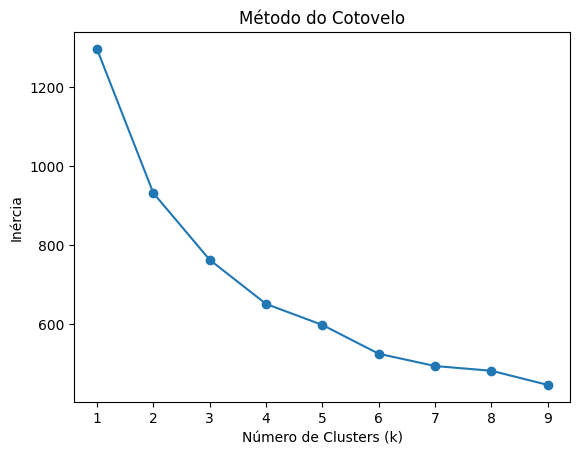

In [25]:
#Avaliar o Número de Clusters
inertia = []
k_range = range(1, 10)
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

plt.plot(k_range, inertia, marker='o')
plt.xlabel('Número de Clusters (k)')
plt.ylabel('Inércia')
plt.title('Método do Cotovelo')
plt.show()

In [26]:
# Verificar se há algum NaN em X_scaled
tem_nan = np.isnan(X_scaled).any()

if tem_nan:
    print("X_scaled contém NaNs.")
else:
    print("X_scaled não contém NaNs.")

# Para ver a quantidade de NaNs por coluna:
nans_por_coluna = np.isnan(X_scaled).sum(axis=0)
print("Número de NaNs por coluna:", nans_por_coluna)

# Para ver a quantidade total de NaNs:
total_nans = np.isnan(X_scaled).sum()
print("Número total de NaNs:", total_nans)

X_scaled não contém NaNs.
Número de NaNs por coluna: [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
Número total de NaNs: 0


In [27]:
# Calcular as médias de cada cluster apenas para colunas numéricas
cluster_summary = Ponta.groupby('Cluster').agg({col: 'mean' for col in Ponta.select_dtypes(include=['number']).columns})
print(cluster_summary)

            Minutos      G-PK    Assist        Xg       xAG    xG+xAg  \
Cluster                                                                 
0        683.294118  0.470588  0.588235  0.758824  0.417647  1.047059   
1           776.375       0.5     1.875     0.825    1.9375    2.6625   
2        741.923077  1.076923       1.0  1.238462  0.784615  1.961538   
3             825.4       1.0       2.0      1.72       2.0      3.52   
4        778.454545  4.363636  1.363636  3.809091  1.254545  4.545455   
5        754.833333  0.333333  0.555556  0.305556  0.466667  0.777778   

              Prgc       PrgP      Cross  Faltas Sofridas    KeyPass  \
Cluster                                                                
0         7.882353  21.705882   5.117647        12.764706   5.235294   
1           13.125     52.125     44.375           16.125      23.75   
2        23.230769  23.615385  24.076923        15.692308   9.692308   
3             42.8       39.4       43.2             23

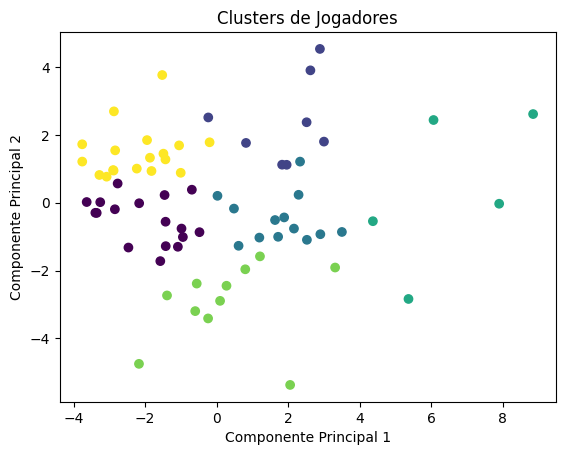

In [28]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

plt.scatter(X_pca[:, 0], X_pca[:, 1], c=clusters, cmap='viridis')
plt.title('Clusters de Jogadores')
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.show()


In [29]:
# Selecionar apenas as colunas numéricas para calcular a correlação
numeric_columns = Ponta.select_dtypes(include=np.number).columns
correlation_matrix = Ponta[numeric_columns].corr()

# Exibir a matriz de correlação
print(correlation_matrix)

                   Minutos      G-PK    Assist        Xg       xAG    xG+xAg  \
Minutos           1.000000  0.125574  0.131499  0.161913  0.167597  0.229959   
G-PK              0.125574  1.000000  0.219942  0.824737  0.168385  0.715390   
Assist            0.131499  0.219942  1.000000  0.254536  0.561456  0.430390   
Xg                0.161913  0.824737  0.254536  1.000000  0.276289  0.871313   
xAG               0.167597  0.168385  0.561456  0.276289  1.000000  0.681643   
xG+xAg            0.229959  0.715390  0.430390  0.871313  0.681643  1.000000   
Prgc              0.162315  0.002621  0.247334  0.138924  0.294518  0.294266   
PrgP              0.318369 -0.309881  0.147120 -0.427245  0.223944 -0.197667   
Cross             0.187050 -0.008826  0.431976  0.029830  0.644908  0.359524   
Faltas Sofridas   0.417967  0.045654  0.304891  0.124202  0.211511  0.215042   
KeyPass           0.333006  0.027308  0.448407  0.128088  0.825913  0.498490   
1/3               0.224435 -0.336749  0.

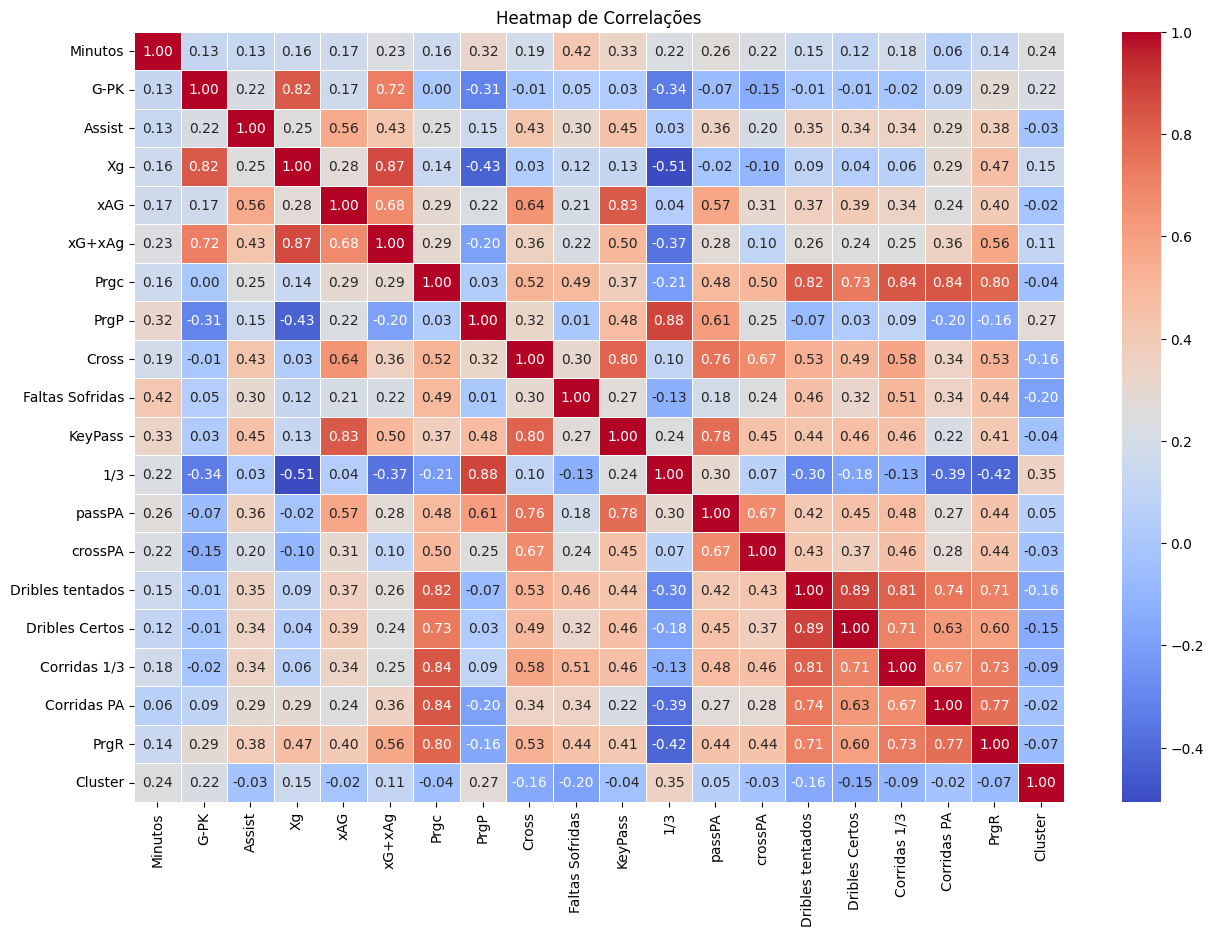

In [30]:
plt.figure(figsize=(15, 10))  # Define o tamanho da figura
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Heatmap de Correlações')
plt.show()

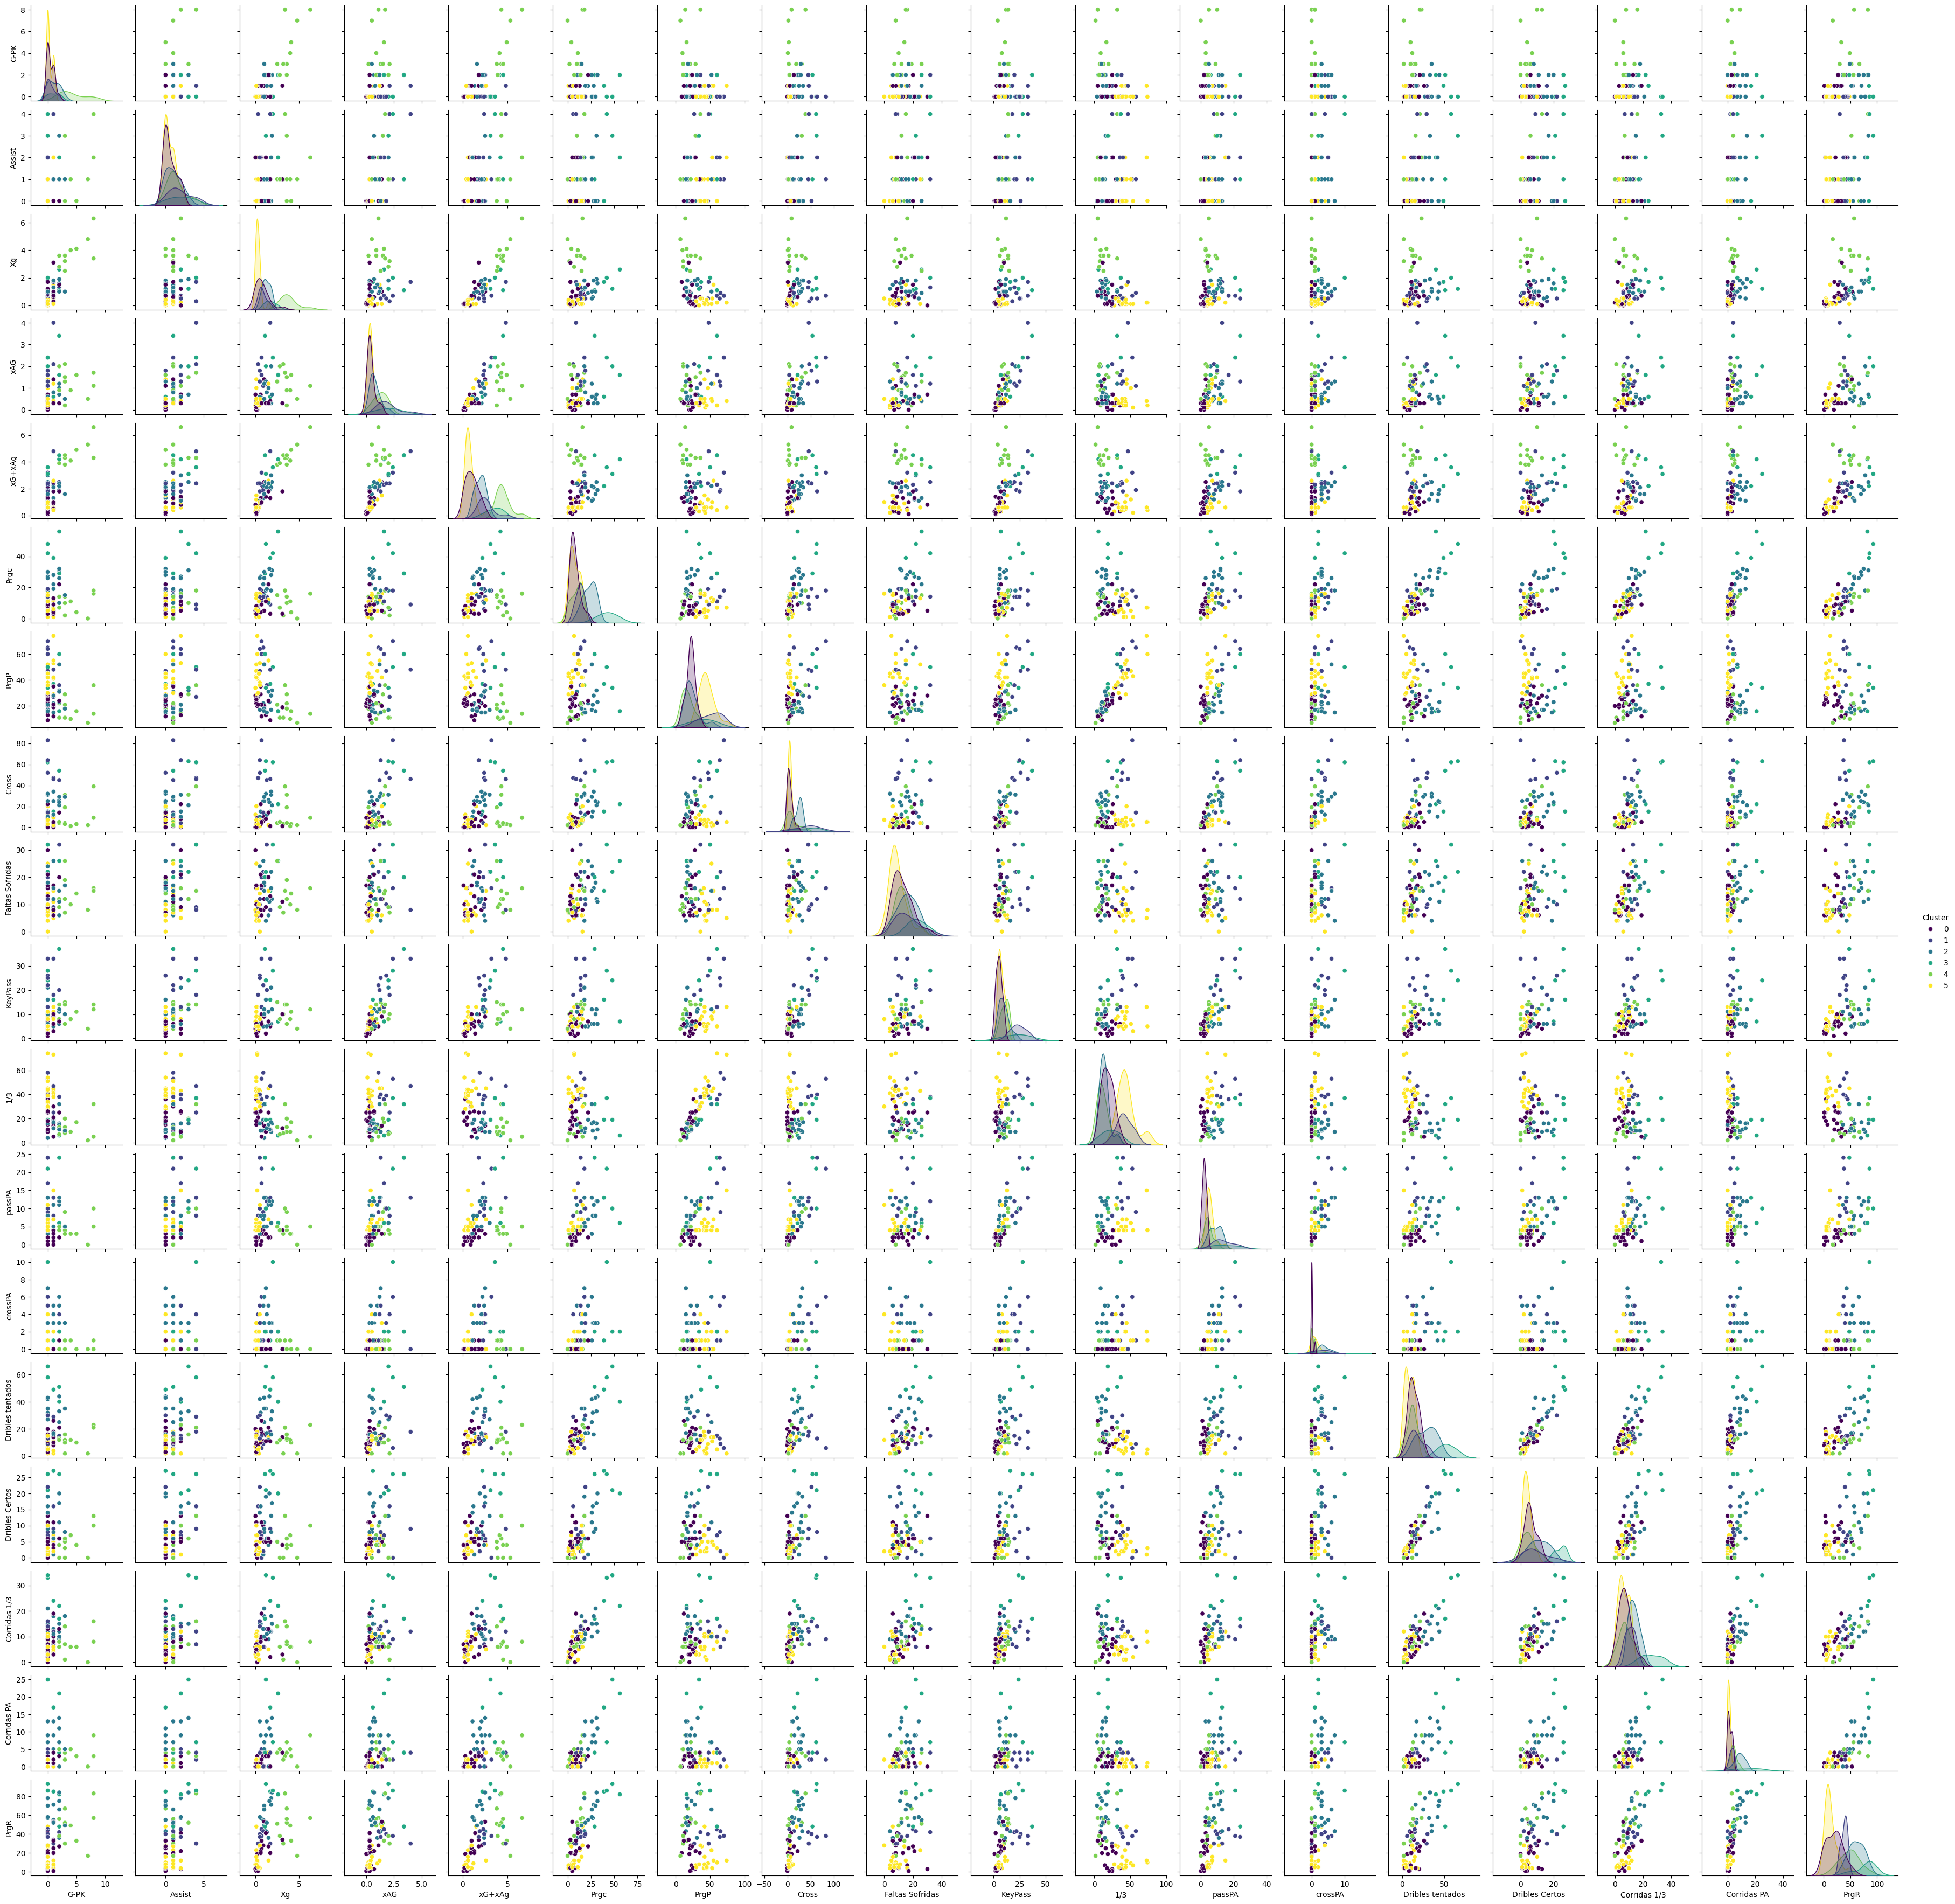

In [31]:
# Adicionar as métricas e o cluster ao DataFrame para visualização
metrics = ['G-PK','Assist','Xg','xAG','xG+xAg','Prgc','PrgP','Cross','Faltas Sofridas','KeyPass','1/3','passPA','crossPA','Dribles tentados','Dribles Certos', 'Corridas 1/3','Corridas PA','PrgR','Cluster']

# Plotar o pair plot para todas as métricas
sns.pairplot(Ponta[metrics], hue='Cluster', palette='viridis', diag_kind='kde', height=2)
plt.show()


### **Comportamento de Variáveis e Distribuição de Clusters para Pontas**

---

### **1. Análise de Correlações com Insights**
## 🧩 Análise de Clusters – Pontas da Série A (2024)

Os pontas foram agrupados em **5 clusters** com base em métricas ofensivas, criativas e de condução. A seguir, a descrição de cada grupo com base nas visualizações dos gráficos `Pairplot` e `Heatmap`.

---

## 📈 Correlações Fortes (r > 0.70)

- `xG` & `xG+xA`: **0.87**  
  → Quanto maior o xG, maior o envolvimento total em chances criadas e finalizadas.  

- `xA` & `Assist`: **0.83**  
  → Jogadores com alta expectativa de assistência também tendem a entregar passes decisivos reais.  

- `PrgP` & `passPA`: **0.82**  
  → Progressões por passe estão fortemente ligadas à quantidade de passes na área.  

- `Cross` & `crossPA`: **0.80**  
  → Mais cruzamentos, mais participações diretas na grande área.  

---

## ⚖️ Correlações Moderadas (0.50 ≤ r < 0.70)

- `KeyPass` & `xA`: **0.66**  
  → Passes-chave se convertem em boas chances, o que eleva a expectativa de assistência.  

- `Dribles Certos` & `Dribles Tentados`: **0.61**  
  → Dribladores bem-sucedidos tendem a arriscar mais.  

- `Corridas 1/3` & `Corridas PA`: **0.74**  
  → Jogadores que avançam no terço final também costumam invadir a área.  

---

## 🚫 Correlações Negativas Relevantes

- `1/3` & `xG`: **-0.51**  
  → Quanto mais presença no terço final como apoio (e não finalização), menor o xG.

---
## 🧩 Análise de Clusters – Pontas da Série A (2024)

Os pontas foram agrupados em **6 clusters** com base em métricas ofensivas, criativas e de condução. A seguir, a descrição de cada grupo com base nas visualizações dos gráficos `Pairplot`, `PCA` e `Heatmap`.

---

### 🟣 Cluster 0 (Roxo escuro)  
🎯 **Extremos produtivos e criativos**  
- Altos valores de **xG**, **xA** e **KeyPass**  
- Participam ativamente do jogo com boas métricas em **PrgC**, **Cross** e **Assistências**  
- Também driblam e conduzem com qualidade  

🔥 *Perfil de pontas protagonistas*, muito influentes na criação e finalização. São peças-chave ofensivas nos seus times.

---

### 🟡 Cluster 1 (Amarelo)  
🔁 **Participação ofensiva equilibrada**  
- Bons números de **xG+xA**, **Dribles Certos** e **Corridas PA**  
- Participam bastante na fase ofensiva, mas com números menos expressivos em passes decisivos  
- Equilibram **criação**, **condução** e **finalização**

🔧 *Perfil de pontas versáteis*, úteis em diversas fases do ataque. Contribuem em várias frentes, mesmo sem números explosivos.

---

### 🔵 Cluster 2 (Azul escuro)  
⚡ **Extremos verticais e dribladores**  
- Altos números de **Dribles Tentados**, **Corridas na 1/3** e **Cross**  
- Baixo envolvimento em construção mais refinada (baixa **KeyPass** e **Assistências**)  
- Atuam com intensidade e profundidade pelos lados  

🚀 *Perfil de pontas agudos*, que atacam espaço e buscam linha de fundo. Podem ser finalizadores secundários ou "quebradores de linha".

---

### 🟦 Cluster 3 (Ciano)  
⏳ **Menor minutagem ou participação reduzida**  
- Baixos valores em praticamente todas as métricas  
- Pode indicar reservas, atletas lesionados ou com poucos minutos

📉 *Grupo com pouco impacto na amostra*, necessitando mais contexto (tempo de jogo, fase da temporada etc.).

---

### 🟩 Cluster 4 (Verde)  
🎯 **Pontas construtores e associativos**  
- Altas taxas de **passPA**, **crossPA** e presença em **PrgP**  
- Participam da circulação ofensiva e da progressão com bola  
- Menos incisivos na finalização, mas com boa leitura de jogo

🧠 *Perfil de pontas inteligentes taticamente*, que se associam bem e ajudam a organizar o ataque.

---

### 🟤 Cluster 5 (Verde-musgo / Azul-esverdeado)  
🧊 **Extremos híbridos e de transição**  
- Valores medianos em **xG**, **xA**, **Dribles** e **Cross**  
- Contribuem para transição ofensiva e têm papel tático definido  
- Menos brilho nos números, mas úteis no coletivo

⚙️ *Perfil de apoio tático*, com função mais complementar. Importantes para equilíbrio da equipe, mesmo sem números de destaque.



---


In [43]:
cluster_names = {
    0: 'ponta criacao',
    1: 'ponta versatil',
    2: 'ponta agudos',
    3: 'ponta sr',
    4: 'ponta tatico',
    5: 'ponta apoio',
}

# Adicionar nomes ao DataFrame
Ponta['Perfil'] = Ponta['Cluster'].map(cluster_names)

# Exibir os primeiros jogadores com seus perfis
print(Ponta[['jogador','time','posicao','idade', 'Minutos', 'G-PK','Assist','Xg','xAG','xG+xAg','Prgc','PrgP','Cross','Faltas Sofridas','KeyPass','1/3','passPA','crossPA','Dribles tentados','Dribles Certos', 'Corridas 1/3','Corridas PA','PrgR','Perfil']].head())

           jogador              time posicao   idade  Minutos  G-PK  Assist   Xg  xAG  xG+xAg  Prgc  PrgP  Cross  Faltas Sofridas  KeyPass  1/3  passPA  crossPA  Dribles tentados  Dribles Certos  Corridas 1/3  Corridas PA  PrgR          Perfil
7   Gustavo Scarpa  Atlético Mineiro   MF,FW  31-151      868     0       1  0.7  2.4     3.2    18    70     83               16       33   53      21        6                 6               0             9            2    38  ponta versatil
8             Hulk  Atlético Mineiro   FW,MF  38-315      822     0       2  1.8  2.0     3.0    18    17     31               22       21    9       6        2                27              13            12            9    78    ponta agudos
19            Rony  Atlético Mineiro   FW,MF  30-025      921     3       0  3.6  0.2     3.8    14    18     19               19        6    9       4        0                12               3            14            4    67    ponta tatico
22    Tomás Cuello  Atlé

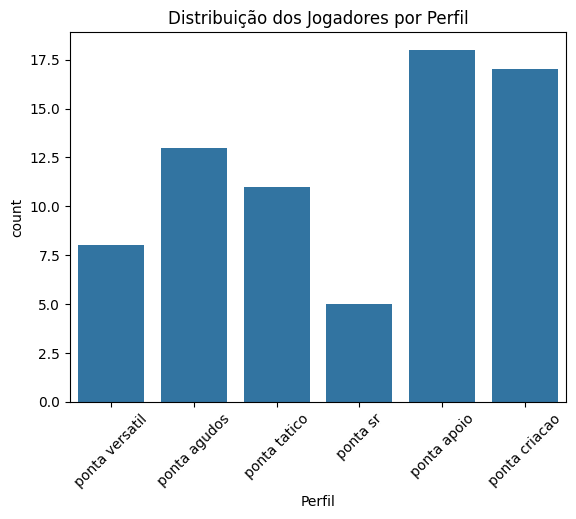

In [44]:
sns.countplot(data=Ponta, x='Perfil')
plt.xticks(rotation=45)
plt.title('Distribuição dos Jogadores por Perfil')
plt.show()


In [40]:
# Função para exibir jogadores de um perfil específico
def exibir_jogadores_por_perfil(perfil_escolhido):
    # Filtrar os jogadores pelo perfil escolhido
    jogadores_filtrados = Ponta[Ponta['Perfil'] == perfil_escolhido]

    if jogadores_filtrados.empty:
        print(f"Nenhum jogador encontrado para o perfil: {perfil_escolhido}")
    else:
        print(f"\nJogadores no perfil: {perfil_escolhido}")
        print(jogadores_filtrados[['jogador','time','posicao','idade', 'Minutos', 'G-PK','Assist','Xg','xAG','xG+xAg','Prgc','PrgP','Cross','Faltas Sofridas','KeyPass','1/3','passPA','crossPA','Dribles tentados','Dribles Certos', 'Corridas 1/3','Corridas PA','PrgR',]])

# Exemplo: Exibir jogadores do perfil "Apoiadores Ofensivos"
# Definir a largura máxima e o número de colunas exibidas
pd.set_option('display.max_columns', None)  # Exibir todas as colunas
pd.set_option('display.width', 1000)        # Aumentar a largura da tabela
perfil_escolhido = "ponta versatil"  # Altere conforme necessário
exibir_jogadores_por_perfil(perfil_escolhido)



Jogadores no perfil: ponta versatil
                 jogador              time posicao   idade  Minutos  G-PK  Assist   Xg  xAG  xG+xAg  Prgc  PrgP  Cross  Faltas Sofridas  KeyPass  1/3  passPA  crossPA  Dribles tentados  Dribles Certos  Corridas 1/3  Corridas PA  PrgR
7         Gustavo Scarpa  Atlético Mineiro   MF,FW  31-151      868     0       1  0.7  2.4     3.2    18    70     83               16       33   53      21        6                 6               0             9            2    38
94           Lucas Mugni             Ceará      MF  33-144      709     1       4  0.3  2.1     2.4     6    27     47                9       18   25       8        4                29              16             7            2    30
154      Matheus Pereira          Cruzeiro      MF  29-031      707     2       1  1.3  1.2     2.5    14    36     45               32       20   38      12        4                15               6            13            4    42
170               Gerson   

In [41]:
# Dicionário dos peso para cada métrica
pesos = {
    'xG+xAg': 10,
    'KeyPass': 5,
    'Cross' : 8,
    '1/3': 2,
    'Dribles Certos': 5,
    'Corridas 1/3': 2,
    'Corridas PA': 7,
    'passPA': 8,
    'crossPA' : 8,

}

# Função para normalizar uma métrica com base no valor máximo
def normalizar(coluna):
    return coluna / coluna.max()

# Calculando as pontuações individuais para cada métrica
for coluna, peso in pesos.items():
    Ponta[coluna + '_Pontuacao'] = Ponta[coluna] * peso

# Calculando a pontuação total
colunas_pontuacao = [coluna + '_Pontuacao' for coluna in pesos.keys()]
Ponta['Pontuacao_Total'] = Ponta[colunas_pontuacao].sum(axis=1)

# **Normalizando a pontuação total para o intervalo [0, 100]**
min_pontuacao = Ponta['Pontuacao_Total'].min()
max_pontuacao = Ponta['Pontuacao_Total'].max()
Ponta['Pontuacao'] = (
    (Ponta['Pontuacao_Total'] - min_pontuacao) / (max_pontuacao - min_pontuacao)
) * 100

# Filtrando os jogadores por perfil desejado e ordenando pelo total normalizado
perfil_escolhido = 'ponta agudos'
jogadores_filtrados = Ponta[Ponta['Perfil'] == perfil_escolhido]
jogadores_ordenados = jogadores_filtrados.sort_values(by='Pontuacao', ascending=False)

# Adicionando uma coluna de ranking
jogadores_ordenados['Ranking'] = range(1, len(jogadores_ordenados) + 1)

# Selecionando as colunas desejadas para exibição
resultado_final = jogadores_ordenados[['Ranking','time','posicao', 'jogador', 'Perfil', 'Pontuacao']]

# Imprimindo o resultado final no console
print("\nRanking de jogadores no perfil:", perfil_escolhido)
print(resultado_final.to_string(index=False))


Ranking de jogadores no perfil: ponta agudos
 Ranking             time posicao              jogador       Perfil  Pontuacao
       1         Cruzeiro   FW,MF            Wanderson ponta agudos  54.827586
       2    Vasco da Gama      FW Nuno Gonçalo Moreira ponta agudos  49.568966
       3    Botafogo (RJ)   FW,MF                Artur ponta agudos  46.465517
       4 Atlético Mineiro   FW,MF                 Hulk ponta agudos   46.37931
       5           Santos      FW            Guilherme ponta agudos  45.603448
       6     Sport Recife   FW,MF   Chrystian Barletta ponta agudos  43.534483
       7        São Paulo      FW       Lucas Ferreira ponta agudos   36.12069
       8        Juventude   FW,MF     Enmerson Batalla ponta agudos  35.689655
       9        Palmeiras   MF,FW       Facundo Torres ponta agudos  34.827586
      10    Internacional   FW,MF               Wesley ponta agudos   31.37931
      11            Ceará      FW      Antonio Galeano ponta agudos  30.948276
      

In [45]:
# Filtrando os jogadores pelo perfil escolhido
perfil_escolhido = 'ponta criacao'  # Defina o perfil desejado
jogadores_filtrados = Ponta[Ponta['Perfil'] == perfil_escolhido].copy()

# Lista com os nomes dos jogadores disponíveis
jogadores_disponiveis = jogadores_filtrados['jogador'].tolist()

# Dicionário para armazenar os valores de mercado inseridos
valores_mercado = {}

# Loop para inserir manualmente os jogadores e seus valores
print(f"Jogadores disponíveis no perfil '{perfil_escolhido}': {jogadores_disponiveis}")

while jogadores_disponiveis:
    # Input para selecionar o jogador
    jogador_escolhido = input("Digite o nome do jogador (ou 'sair' para finalizar): ")

    # Verifica se o nome inserido é válido ou finaliza o processo
    if jogador_escolhido.lower() == 'sair':
        break
    elif jogador_escolhido not in jogadores_disponiveis:
        print("Jogador não encontrado. Tente novamente.")
        continue

    # Input para inserir o valor de mercado
    while True:
        try:
            valor = float(input(f"Insira o valor de mercado para {jogador_escolhido} (€M): "))
            valores_mercado[jogador_escolhido] = valor  # Armazena o valor inserido
            jogadores_disponiveis.remove(jogador_escolhido)  # Remove da lista de disponíveis
            break
        except ValueError:
            print("Valor inválido. Por favor, insira um número válido.")

# Adicionando os valores de mercado ao DataFrame
jogadores_filtrados['Valor de Mercado (€M)'] = jogadores_filtrados['jogador'].map(valores_mercado)

# Calculando o custo por ponto
jogadores_filtrados['Custo por Ponto (€M)'] = (
    jogadores_filtrados['Valor de Mercado (€M)'] / jogadores_filtrados['Pontuacao']
)

# Calculando o Score de valor
jogadores_filtrados['Score de Valor'] = (
    jogadores_filtrados['Pontuacao'] / jogadores_filtrados['Valor de Mercado (€M)']
)

# Ordenando pelo maior Score de valor
resultado_final = jogadores_filtrados.sort_values(by='Score de Valor', ascending=False)

# Adicionando a coluna de ranking
resultado_final['Ranking'] = range(1, len(resultado_final) + 1)

# Selecionando as colunas desejadas para exibição
resultado_final = resultado_final[
    ['Ranking', 'jogador', 'Valor de Mercado (€M)', 'Pontuacao', 'Custo por Ponto (€M)', 'Score de Valor']
]

# Exibindo o resultado final
print("\nRanking de jogadores por eficiência de valor:")
print(resultado_final.to_string(index=False))


Jogadores disponíveis no perfil 'ponta criacao': ['Jean Lucas', 'Dieguinho', 'Raniele', 'Christian', 'Lucas Sasha', 'Dodi', 'Martin Braithwaite', 'Mathías Villasanti', 'Luis Mandaca', 'Emiliano Martínez', 'Richard Ríos', 'Eric Ramires', 'Lucas Barbosa', 'Tiquinho Soares', 'Christian Rivera', 'Janderson', 'Matheusinho']
Digite o nome do jogador (ou 'sair' para finalizar): sair

Ranking de jogadores por eficiência de valor:
 Ranking            jogador  Valor de Mercado (€M)  Pontuacao  Custo por Ponto (€M)  Score de Valor
       1         Jean Lucas                    NaN  14.137931                  <NA>            <NA>
       2          Dieguinho                    NaN   7.931034                  <NA>            <NA>
       3            Raniele                    NaN   1.551724                  <NA>            <NA>
       4          Christian                    NaN  13.793103                  <NA>            <NA>
       5        Lucas Sasha                    NaN   6.551724             


Jogadores selecionados: Wanderson, Estêvão Willian, Guilherme, Chrystian Barletta, Lucas Ferreira
                jogador          time posicao   idade  Minutos  G-PK  Assist   Xg  xAG  xG+xAg  Prgc  PrgP  Cross  Faltas Sofridas  KeyPass  1/3  passPA  crossPA  Dribles tentados  Dribles Certos  Corridas 1/3  Corridas PA  PrgR
158           Wanderson      Cruzeiro   FW,MF  30-241      774     0       0  1.2  1.3     2.5    18    15     32                4       16    9      13        7                35              19             9            9    43
362     Estêvão Willian     Palmeiras   MF,FW  18-042      831     0       3  1.2  2.0     3.1    48    34     63               22       24   19      10        2                66              21            34           25    93
416           Guilherme        Santos      FW  30-053      678     1       0  1.8  0.3     2.1    28    28     34               16        6   17      11        3                16               8            18     

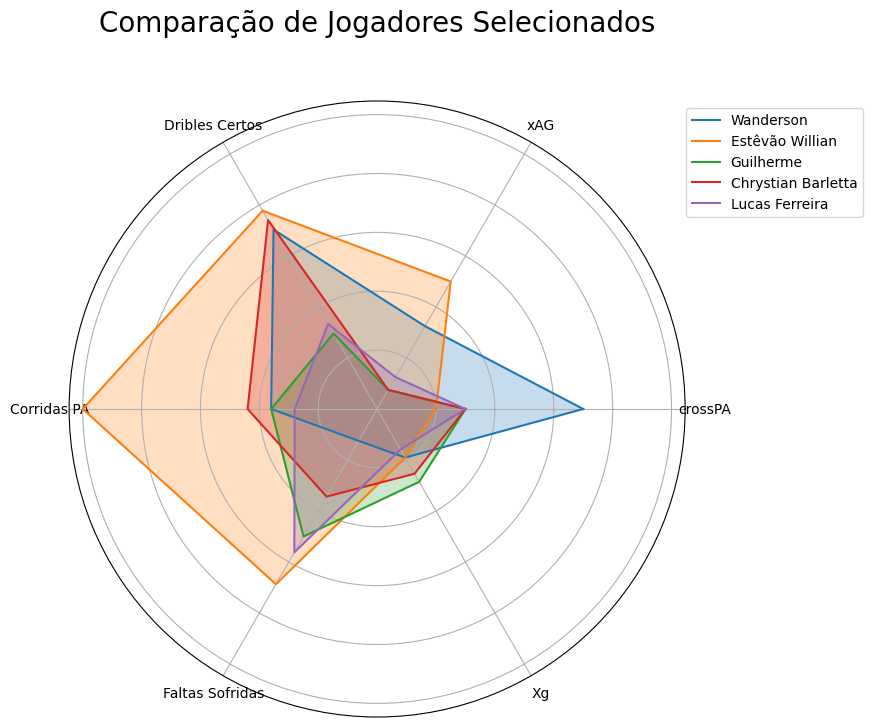

In [49]:
def radar_chart_por_jogadores(jogadores_selecionados, df):
    # Filtrar os jogadores pelos nomes inseridos
    jogadores_filtrados = df[df['jogador'].isin(jogadores_selecionados)]

    if jogadores_filtrados.empty:
        print(f"Nenhum jogador encontrado nos nomes fornecidos: {jogadores_selecionados}")
        return

    print(f"\nJogadores selecionados: {', '.join(jogadores_filtrados['jogador'])}")
    print(jogadores_filtrados[['jogador','time','posicao','idade', 'Minutos', 'G-PK','Assist','Xg','xAG','xG+xAg','Prgc','PrgP','Cross','Faltas Sofridas','KeyPass','1/3','passPA','crossPA','Dribles tentados','Dribles Certos', 'Corridas 1/3','Corridas PA','PrgR',]])

    # Definir as métricas a serem exibidas no radar
    metricas = ['crossPA','xAG','Dribles Certos','Corridas PA','Faltas Sofridas','Xg']
    num_vars = len(metricas)

    # Normalizar as métricas para todas ficarem na escala [0, 1]
    jogadores_normalizados = jogadores_filtrados.copy()
    for metrica in metricas:
        min_val = df[metrica].min()
        max_val = df[metrica].max()
        jogadores_normalizados[metrica] = (jogadores_filtrados[metrica] - min_val) / (max_val - min_val)

    # Ângulos para o gráfico radar
    angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()
    angles += angles[:1]  # Fechar o círculo

    fig, ax = plt.subplots(figsize=(8, 8), subplot_kw=dict(polar=True))

    # Loop pelos jogadores selecionados
    for i, row in jogadores_normalizados.iterrows():
        valores = row[metricas].tolist()
        valores += valores[:1]  # Fechar o círculo

        # Plotar a linha e o preenchimento para o jogador
        ax.plot(angles, valores, label=row['jogador'])
        ax.fill(angles, valores, alpha=0.25)

    # Configurações do gráfico
    ax.set_yticklabels([])
    ax.set_xticks(angles[:-1])
    ax.set_xticklabels(metricas)

    plt.legend(loc='upper right', bbox_to_anchor=(1.3, 1))
    plt.title('Comparação de Jogadores Selecionados', size=20, color='black', y=1.1)
    plt.show()

# Exemplo de uso: Insira os nomes dos jogadores que deseja comparar
jogadores_selecionados = ['Estêvão Willian','Wanderson','Lucas Ferreira','Guilherme','Chrystian Barletta']  # Altere conforme necessário
radar_chart_por_jogadores(jogadores_selecionados, Ponta)